In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('/home/akeemlag/Downloads/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [147]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [148]:
cols_to_drop = ['area_type', 'availability', 'balcony', 'society']
df = df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [149]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [150]:
# Data Cleaning
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [151]:
df.bath = df.bath.fillna(df.bath.mean())

In [152]:
df = df.dropna(axis=0)

In [153]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [154]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [155]:
# Convert our Size to an int
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [156]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [157]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [158]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True 

In [159]:
df[~df.total_sqft.apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.00000,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.00000,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.69261,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.00000,59.135,2


In [160]:
def convert_rng_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [161]:
convert_rng_to_num('2100-2332')

2216.0

In [162]:
df_copy = df.copy()
df_copy['total_sqft'] = df_copy['total_sqft'].apply(convert_rng_to_num)

In [163]:
df_copy.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [164]:
df2 = df_copy.copy()

In [165]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

In [166]:
df2.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [169]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [170]:
# Remove spacing in location
df2.location = df2.location.apply(lambda x: x.strip())

In [180]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Whitefield              540
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          273
Thanisandra             237
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1293, dtype: int64

In [181]:
loc_stat_less_than_10 = location_stats[location_stats<=10]
loc_stat_less_than_10

location
1st Block Koramangala    10
Nagadevanahalli          10
Sector 1 HSR Layout      10
Dairy Circle             10
Sadashiva Nagar          10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1052, dtype: int64

In [182]:
df2.location = df2.location.apply(lambda x: 'other' if x in loc_stat_less_than_10 else x)

In [187]:
df2.location.value_counts()

location
other                        2882
Whitefield                    540
Sarjapur  Road                397
Electronic City               304
Kanakpura Road                273
                             ... 
Nehru Nagar                    11
Narayanapura                   11
Kodigehalli                    11
2nd Phase Judicial Layout      11
Marsur                         11
Name: count, Length: 242, dtype: int64

In [190]:
# Outlier detection and removal
df2['total_sqft'].describe()

count    13257.000000
mean      1558.809175
std       1238.478935
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [210]:
df2.total_sqft.value_counts()

total_sqft
1200.0     843
1100.0     221
1500.0     204
2400.0     195
600.0      180
          ... 
2485.0       1
30400.0      1
1701.0       1
1264.0       1
1557.0       1
Name: count, Length: 1996, dtype: int64

In [212]:
df2[df2.total_sqft/df2.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [213]:
df3 = df2[~(df2.total_sqft/df2.BHK<300)]

In [214]:
df3.shape

(12559, 7)

In [215]:
df3.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [224]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df4 = remove_pps_outlier(df3)

In [225]:
df4.shape

(10286, 7)

In [226]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [233]:
df4.groupby(['location', 'BHK'])['BHK'].value_counts().sort_values(ascending=False)

location              BHK
other                 2      984
                      3      858
Whitefield            2      232
other                 4      224
Electronic City       2      179
                            ... 
5th Block Hbr Layout  5        1
                      6        1
6th Phase JP Nagar    4        1
8th Phase JP Nagar    5        1
9th Phase JP Nagar    1        1
Name: count, Length: 806, dtype: int64

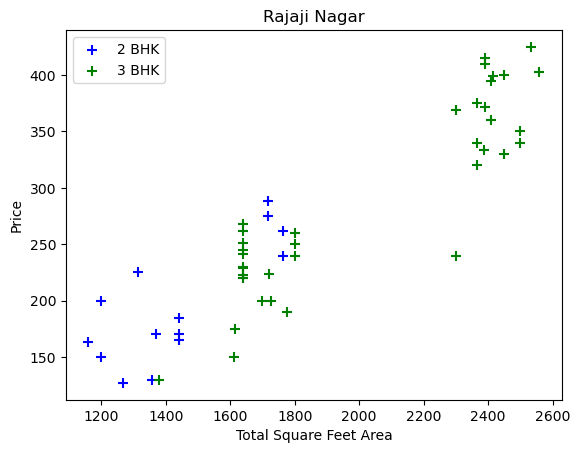

In [238]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', marker='+', s=50, label='2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location);
    plt.legend()

plot_scatter_chart(df4, 'Rajaji Nagar')


In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape(0),
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index_values)
    return df.drop(exclude_indices, axis='index')